In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
netflix_data = pd.read_csv("netflix_data.csv")  
netflix_data.head(3)

# Filter data for movies released in the 1990s
if not netflix_data.empty:
    movies_1990s = netflix_data[(netflix_data['type'] == 'Movie') & 
                                (netflix_data['release_year'] >= 1990) & 
                                (netflix_data['release_year'] <= 1999)]
else:
    movies_1990s = pd.DataFrame()

# Calculate the most frequent movie duration in the 1990s
if not movies_1990s.empty:
    duration = movies_1990s['duration'].mode()[0]  # Save the most frequent duration as 'duration'
else:
    duration = None

# Count the number of short action movies (duration < 90 minutes)
if not movies_1990s.empty:
    short_action_movies = movies_1990s[(movies_1990s['duration'] < 90) & 
                                       (movies_1990s['genre'].str.contains('Action', case=False))]
    short_movie_count = len(short_action_movies)
else:
    short_action_movies = pd.DataFrame()
    short_movie_count = 0

# Print results
print(f"Most Frequent Movie Duration in the 1990s: {duration}")
print(f"Number of Short Action Movies in the 1990s: {short_movie_count}")

Most Frequent Movie Duration in the 1990s: 94
Number of Short Action Movies in the 1990s: 7


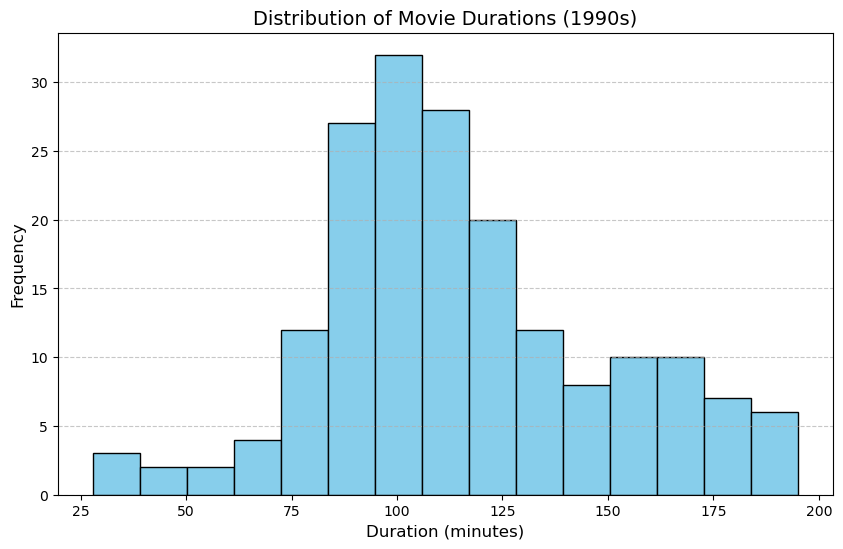

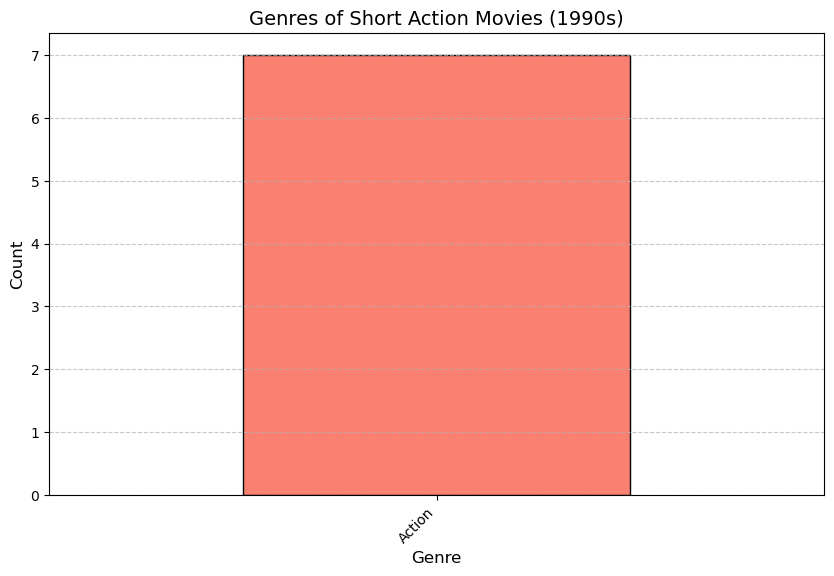

In [31]:
# Plot a histogram of movie durations
if not movies_1990s.empty:
    plt.figure(figsize=(10, 6))
    plt.hist(movies_1990s['duration'], bins=15, color='skyblue', edgecolor='black')
    plt.title("Distribution of Movie Durations (1990s)", fontsize=14)
    plt.xlabel("Duration (minutes)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot a bar chart for genres of short movies
if not short_action_movies.empty:
    short_movies_genres = short_action_movies['genre'].value_counts()

    plt.figure(figsize=(10, 6))
    short_movies_genres.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title("Genres of Short Action Movies (1990s)", fontsize=14)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()